Using Keras to evaluate the Fashion-MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Importing dependencies and loading our data 

In [5]:
# Importing dependencies
%tensorflow_version 2.x
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

# Loading the Fashion Mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
fashion_data = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Visualizing our data

(60000, 28, 28) (60000,) (10000, 28, 28)


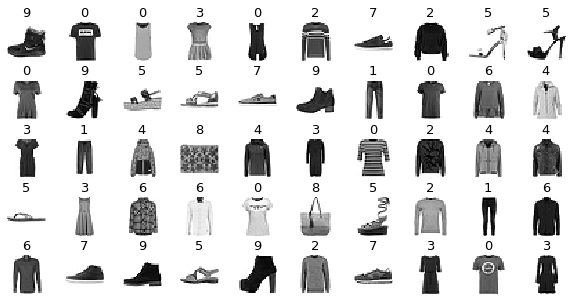

In [6]:
# Visualizing the raw data and its properties
print(fashion_data[0][0].shape, fashion_data[0][1].shape, fashion_data[1][0].shape)

# Looking at each class in the dataset
x, y = fashion_data[0][0], fashion_data[0][1]
cols = 10
rows = 5
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(cols,rows))
for row in range(rows):
  for col in range(cols):
    ## Getting our index
    index = cols * row + col 
    plt.subplot(rows , cols, index+1)
    plt.imshow(x[index], cmap = 'binary', interpolation = 'nearest')
    plt.axis('off')
    plt.title(class_names[y[index]], fontsize = 13)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

Preparing our data

In [0]:
# Splitting the data
X_train, y_train, X_test, y_test = fashion_data[0][0], fashion_data[0][1], fashion_data[1][0], fashion_data[1][1] 

# Normalizing the data
X_train = X_train / 255
X_test = X_test / 255

# Reshaping the data
ind = np.arange(len(X_train))

np.random.seed(24)
np.random.shuffle(ind)
X_train, y_train, X_test, y_test = X_train[:-10000], y_train[:-10000], X_train[-10000:], y_train[-10000:]

Building our model using Keras' functional API

In [0]:
# Importing keras dependencies 

from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Input, Dense
from tensorflow.keras.models import Model

In [11]:
# Building our very basic model
inputs = Input(shape=(28,28))
flat = Flatten()(inputs)
output_1 = Dense(28, activation='relu')(flat)
output_2 = Dense(28, activation='relu')(output_1)

predictions = Dense(10, activation='softmax')(output_2)

# Creating our model with the input layer and three Dense layers

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Looking at the topology of our model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_10 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                290       
Total params: 23,082
Trainable params: 23,082
Non-trainable params: 0
_________________________________________________________________


Fitting our model

In [12]:
# Fitting our model
functional_model = model.fit(X_train, y_train, batch_size=16, epochs=15, validation_data=(X_test, y_test))  

Epoch 1/15
3125/3125 [==============================] - 6s 2ms/step - loss: 0.5614 - accuracy: 0.8038 - val_loss: 0.4662 - val_accuracy: 0.8313
Epoch 2/15
3125/3125 [==============================] - 6s 2ms/step - loss: 0.4156 - accuracy: 0.8514 - val_loss: 0.4145 - val_accuracy: 0.8511
Epoch 3/15
3125/3125 [==============================] - 6s 2ms/step - loss: 0.3776 - accuracy: 0.8654 - val_loss: 0.3732 - val_accuracy: 0.8666
Epoch 4/15
3125/3125 [==============================] - 6s 2ms/step - loss: 0.3555 - accuracy: 0.8714 - val_loss: 0.3747 - val_accuracy: 0.8662
Epoch 5/15
3125/3125 [==============================] - 6s 2ms/step - loss: 0.3369 - accuracy: 0.8767 - val_loss: 0.3802 - val_accuracy: 0.8638
Epoch 6/15
3125/3125 [==============================] - 6s 2ms/step - loss: 0.3228 - accuracy: 0.8814 - val_loss: 0.3926 - val_accuracy: 0.8515
Epoch 7/15
3125/3125 [==============================] - 6s 2ms/step - loss: 0.3129 - accuracy: 0.8853 - val_loss: 0.3696 - val_accuracy:

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8754


[0.3565846085548401, 0.8754000067710876]

Evaluating our model

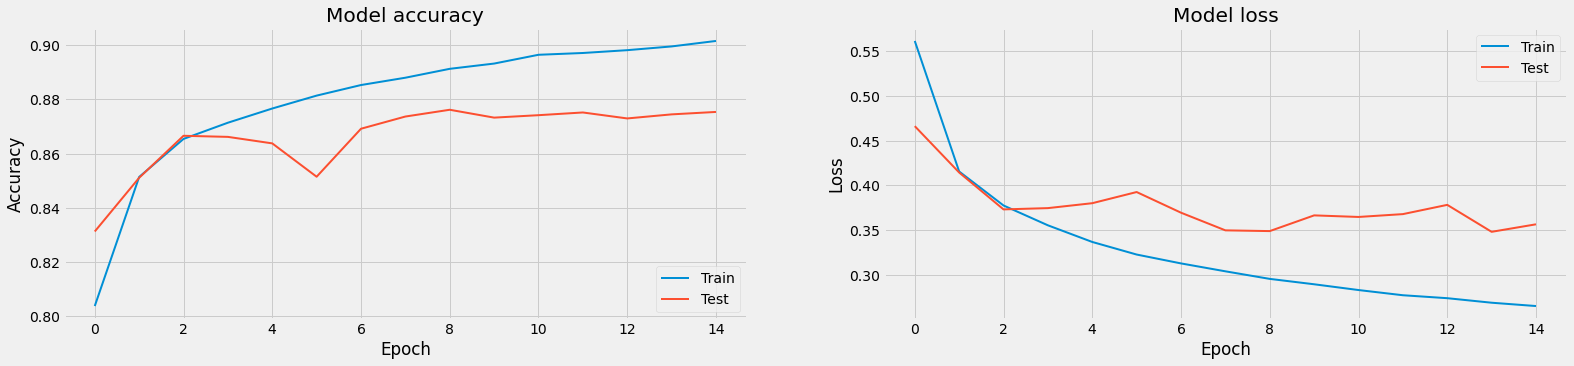

In [16]:
# Importing matplotlib style 
import matplotlib.style as style  

# Plotting our model
fig, ax = plt.subplots(1,2, figsize=(24,5))

# Plotting the accuracy of our model
style.use('fivethirtyeight')
ax[0].plot(functional_model.history['accuracy'], lw=2)
ax[0].plot(functional_model.history['val_accuracy'],lw=2)
ax[0].grid(True)
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='lower right')

# Plotting the loss of our model
style.use('fivethirtyeight')
ax[1].plot(functional_model.history['loss'],lw=2)
ax[1].plot(functional_model.history['val_loss'],lw=2)
ax[1].grid(True)
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper right')
plt.show();

Our current model has achieved an accuracy of 87.54 %. Our graphs are indicated that our model seems to be overfitting the data. 